# Dataset

The following dataset contains reviews of Boston Airbnb
The dataset can be downloaded from Kaggle on the following link
https://www.kaggle.com/airbnb/boston/data
I only chose the first 200 rows for the analysis as a small sample. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

reviews = pd.read_csv("../clasemasterpython/reviews2.csv")

In [2]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


# Sentiment Analysis with nltk library

In [3]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in reviews['comments'].values[:5]:
    print sentence
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print '{0}: {1}, '.format(k, ss[k])
    print()

My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)
compound: 0.9626, 
neg: 0.0, 
neu: 0.648, 
pos: 0.352, 
()
Great location for both airport and city - great amenities in the house: Plus Islam was always very helpful even though he was away
compound: 0.9061, 
neg: 0.0, 
neu: 0.639, 
pos: 0.361, 
()
We really enjoyed our stay at Islams house. From the outside the house didn't look so inviting but the inside was very nice! Even though Islam himself was not there everything was prepared for our arrival. The airport T Station is only a 5-10 min walk away. The only little issue was that all the people in the house had to share one bathroom. But it was not really a problem and it worked out fine. We would recommend Islams place for a stay in Boston.
compound: 0.9663, 
neg: 0.0, 
neu

c:\python27\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Filter out non-english reviews

In [4]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

In [5]:
reviews_f = [r for r in reviews['comments'] if pd.notnull(r) and get_language(r) == 'english']

c:\python27\lib\site-packages\ipykernel_launcher.py:16: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  app.launch_new_instance()


In [6]:
pscores = [sid.polarity_scores(comment) for comment in reviews_f]

Text(0.5,1,'Neutrality')

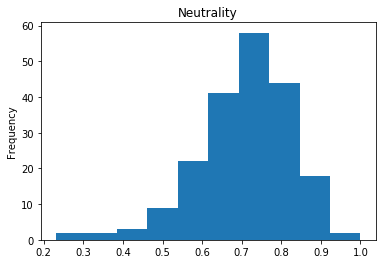

In [7]:
import pylab as pl
from pandas import *
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')
pl.title("Neutrality")

Text(0.5,1,'Positivity')

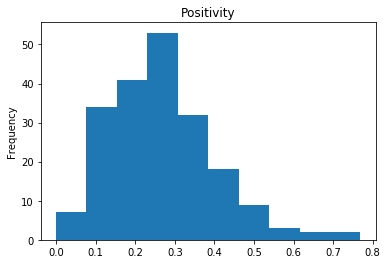

In [8]:
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')
pl.title("Positivity")

Text(0.5,1,'Negativity')

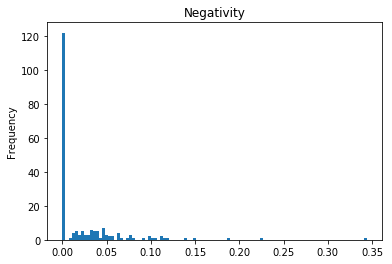

In [9]:
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)
pl.title("Negativity")

# Collocations

A collocation is a sequence of words that co-occur more often that would be expected by chance. What we want to achieve now is to find collocations that have a high importance in the text and display them as main take aways of our reviews.

In [10]:
from nltk.collocations import *
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

comments = BigramCollocationFinder.from_words(
   nltk.corpus.genesis.words('comments.txt'))

comments.apply_freq_filter(3) 

# return the 10 n-grams with the highest PMI (point wise mutual information)
comments.nbest(bigram_measures.pmi, 10)  

[(u'necessary', u'utilities'),
 (u'La', u'chambre'),
 (u'any', u'issues'),
 (u'blue', u'line'),
 (u'common', u'areas'),
 (u'conveniently', u'located'),
 (u'Highly', u'recommended'),
 (u'come', u'back'),
 (u'Would', u'highly'),
 (u'last', u'minute')]